In [1]:
!pip install librosa

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!pip install resampy

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd

In [5]:
filename='/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio/fold1/102842-3-0-1.wav'

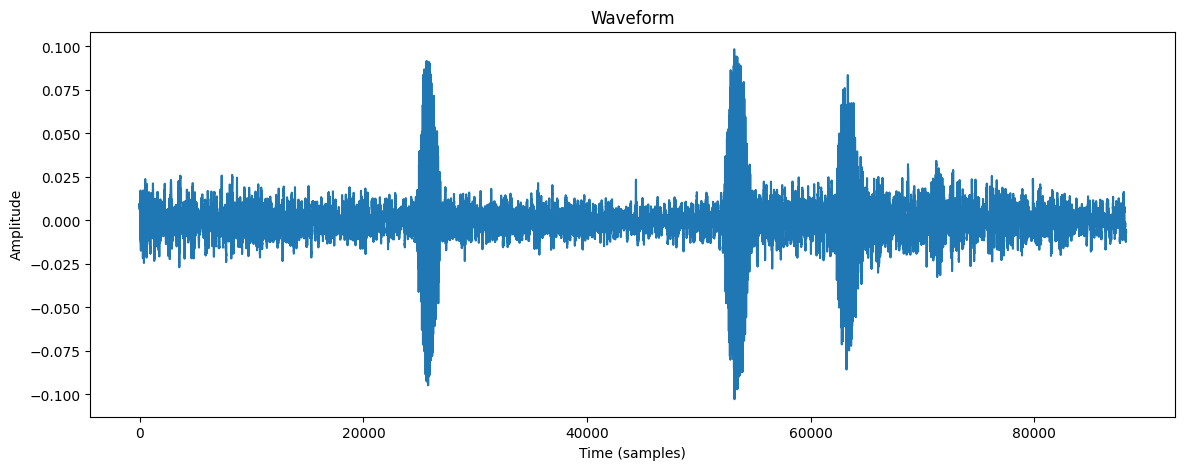

In [6]:
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(filename)

In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[ 354,  236],
       [ 370,  250],
       [ 377,  230],
       ...,
       [-302, -133],
       [-294, -193],
       [-229, -138]], dtype=int16)

In [11]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio/UrbanSound8K.csv')
metadata


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [12]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [13]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio/fold4/107653-9-0-7.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
librosa_audio_data

array([0.0053512 , 0.00756072, 0.00712306, ..., 0.00389422, 0.00776612,
       0.01260556], dtype=float32)

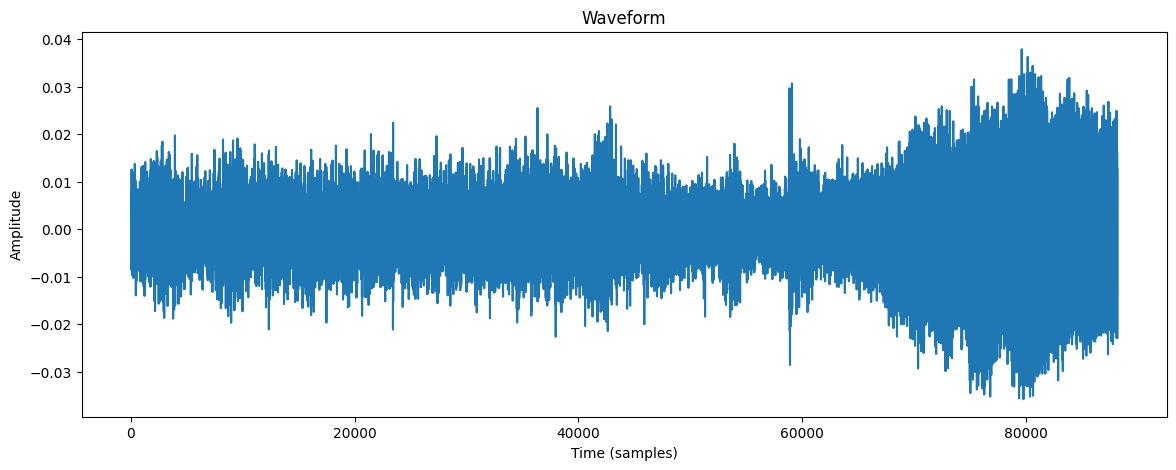

In [15]:
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(audio_file_path)
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(audio_file_path)

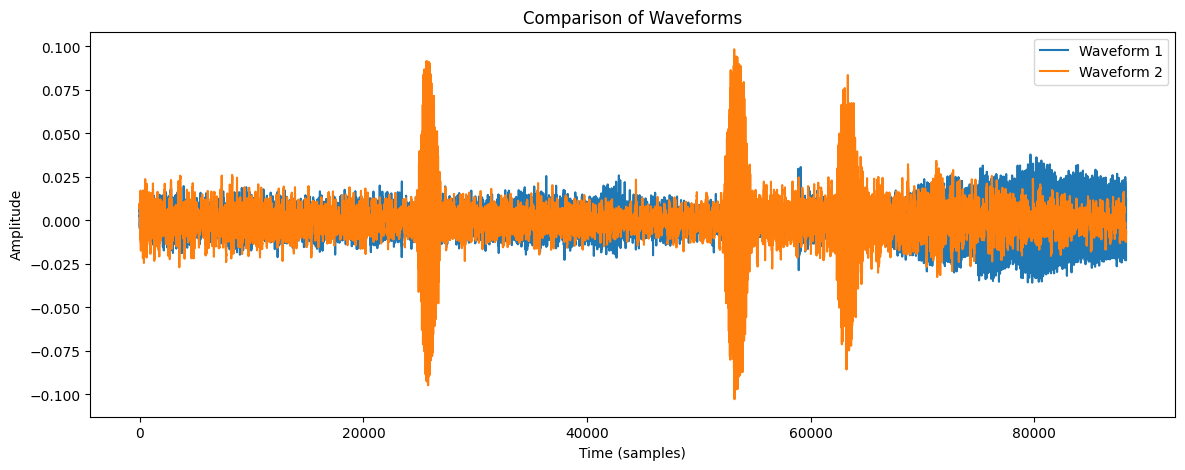

In [16]:
import matplotlib.pyplot as plt

# Load audio files
data1, sample_rate1 = librosa.load(audio_file_path)
data2, sample_rate2 = librosa.load(filename)

# Plot the waveforms
plt.figure(figsize=(14, 5))

plt.plot(data1, label='Waveform 1')
plt.plot(data2, label='Waveform 2')

plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Comparison of Waveforms')
plt.legend()

plt.show()

In [17]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [18]:
mfccs

array([[-3.7978192e+02, -3.4890488e+02, -3.4165063e+02, ...,
        -3.5948181e+02, -3.5286880e+02, -3.5028763e+02],
       [ 9.1505173e+01,  9.1420013e+01,  9.2058891e+01, ...,
         7.8821457e+01,  7.7112061e+01,  8.3148254e+01],
       [-3.0511839e+01, -3.3466782e+01, -3.4874580e+01, ...,
        -4.2660343e+01, -3.6770851e+01, -3.4710129e+01],
       ...,
       [-4.5778394e+00,  2.2756972e+00, -1.4075026e-02, ...,
         8.9842281e+00,  1.3464484e+01,  7.3974881e+00],
       [-4.8058743e+00, -5.5403166e+00, -6.0310011e+00, ...,
         5.9159689e+00,  1.1383974e+01,  9.0587759e+00],
       [ 3.1505473e+00, -4.0977240e-02,  9.5220661e-01, ...,
        -5.6040678e+00, -6.9159465e+00, -7.7459435e+00]], dtype=float32)

In [19]:
#### Extracting MFCC's For every audio file
import os
audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio/UrbanSound8K.csv')
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [21]:
!pip install resampy

In [22]:
import numpy as np
from tqdm import tqdm
import resampy
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [26:16,  2.44it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [59:58,  2.87it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [59:59,  3.21it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [1:02:40,  2.32it/s]


In [23]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [24]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(8732, 40)

In [26]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [28]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575471e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305033e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65353084e-01, -2.05009365e+01, ...,
         2.85459423e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490944e-01,  7.11009145e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811938e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066138e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651175e+00]], dtype=float32)

In [31]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [39]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
# Define callbacks to save the best model during training
checkpoint = ModelCheckpoint("audio_classification.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
#best_model = load_model("audio_classification.hdf5")

# Evaluate the best model
#accuracy = best_model.evaluate(X_test, y_test)[1]
#print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/20
207/219 [===========================>..] - ETA: 0s - loss: 1.2520 - accuracy: 0.5765
Epoch 1: val_accuracy improved from -inf to 0.66342, saving model to audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.2488 - accuracy: 0.5775 - val_loss: 1.0615 - val_accuracy: 0.6634
Epoch 2/20
216/219 [============================>.] - ETA: 0s - loss: 1.2573 - accuracy: 0.5703
Epoch 2: val_accuracy did not improve from 0.66342
219/219 [==============================] - 1s 4ms/step - loss: 1.2569 - accuracy: 0.5708 - val_loss: 1.0646 - val_accuracy: 0.6525
Epoch 3/20
211/219 [===========================>..] - ETA: 0s - loss: 1.2251 - accuracy: 0.5798
Epoch 3: val_accuracy did not improve from 0.66342
219/219 [==============================] - 1s 7ms/step - loss: 1.2243 - accuracy: 0.5792 - val_loss: 1.0762 - val_accuracy: 0.6491
Epoch 4/20
210/219 [===========================>..] - ETA: 0s - loss: 1.2072 - accuracy: 0.5868
Epoch 4: val_accuracy impr

In [43]:
###KNN
import joblib
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Save the trained model to a .pkl file
joblib.dump(knn, 'audio_classification1.pkl')

# Load the model from the .pkl file
loaded_model = joblib.load('audio_classification1.pkl')

# Use the loaded model to make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9707498568975387


In [44]:
loaded_model = joblib.load('audio_classification1.pkl')

# Use the loaded model to make predictions on the test set
y_pred = loaded_model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9707498568975387


Predicted Audio: dog_bark


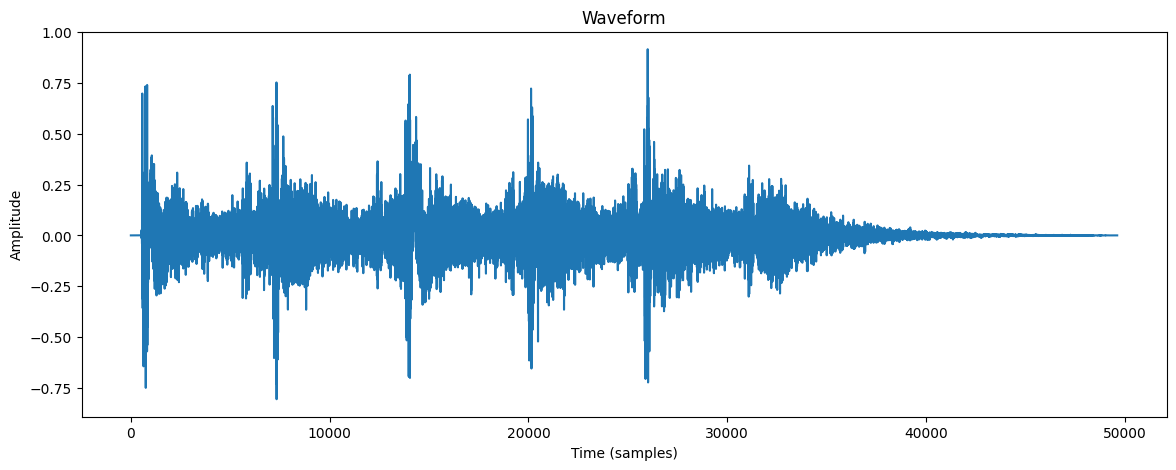

In [46]:
import os
import numpy as np
import pandas as pd
import librosa
import joblib

# Function to extract features from a single audio file
def extract_features_single(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

# Define the path to the audio file you want to use as an example
example_audio_file = '/content/drive/MyDrive/UrbanSound8K/audio/fold1/7061-6-0-0.wav'

# Load the trained model from the .pkl file
loaded_model = joblib.load('audio_classification1.pkl')

# Extract features from the example audio file
example_features = extract_features_single(example_audio_file)

# Reshape the features to match the shape expected by the model
example_features = example_features.reshape(1, -1)

# Use the loaded model to predict the class label of the example audio file
predicted_label = loaded_model.predict(example_features)

# Convert predicted_label to a one-dimensional array
predicted_label = np.ravel(predicted_label)

# Load the UrbanSound8K metadata CSV file to extract class labels
metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8K/NewUrbanSound/audio/UrbanSound8K.csv')

# Extract class labels from the CSV file
class_labels = metadata['class'].unique()

# Decode the predicted label using the extracted class labels
predicted_class = class_labels[int(predicted_label[0])]

print("Predicted Audio:", predicted_class)

plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(example_audio_file)
plt.plot(data)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(example_audio_file)
